In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/diabetes_cleaned.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


<AxesSubplot:>

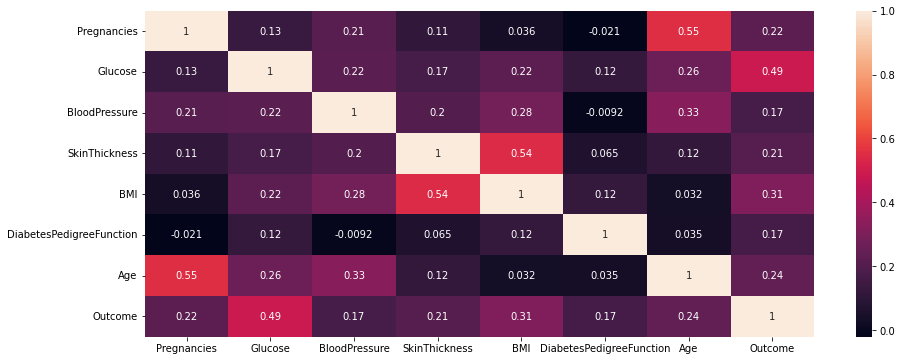

In [3]:

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Scatter plot for Glucose vs BMI')

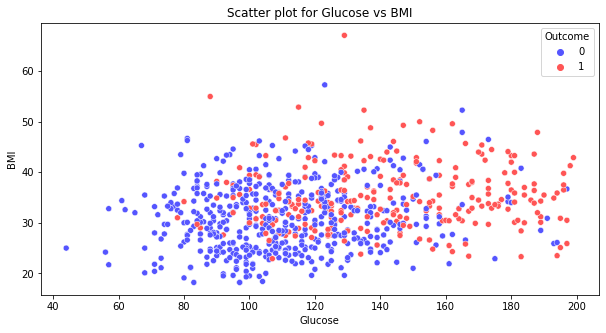

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(
    data=df,
    x='Glucose',
    y='BMI',
    hue='Outcome',
    palette='seismic',
    ax=ax
)
ax.set_title('Scatter plot for Glucose vs BMI')

In [30]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = df[['Glucose', 'BMI']]
y = df['Outcome']

In [8]:
from sklearn import linear_model

In [9]:
log_reg_2d = linear_model.LogisticRegression(random_state=42)
log_reg_2d.fit(X, y)

print(f'w0: {log_reg_2d.intercept_}')
print(f'w1, w2: {log_reg_2d.coef_}')

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [10]:
X_new = [[180, 51]]
y_new_predict = log_reg_2d.predict(X_new)

print(f'Predicted: {y_new_predict}')

Predicted: [1]


In [13]:
y_new_propa_predict = log_reg_2d.predict_proba(X_new)

print(f'Proba predict: {np.round(y_new_propa_predict, 2)}')

Proba predict: [[0.05 0.95]]


In [16]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

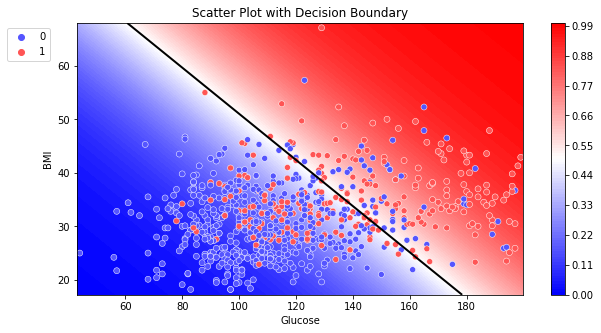

In [17]:
plot_probabilities_2d(X, y, log_reg_2d)

In [18]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)

log_reg_full.fit(X, y)

y_pred = log_reg_full.predict(X)

In [21]:
X_temp = X.copy()
X_temp['Prediction'] = y_pred

X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


In [22]:
df2 = pd.read_csv('data/task_data.csv')
df2.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


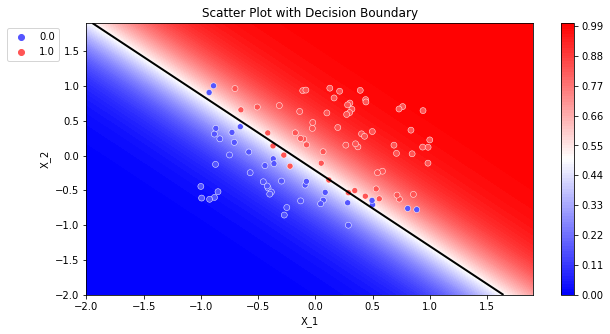

In [26]:
X = df2.drop(['y', 'SNo'], axis=1)
y = df2['y']

log_reg = linear_model.LogisticRegression(random_state=42, solver='sag')

log_reg.fit(X, y)

y_pred = log_reg.predict(X)

plot_probabilities_2d(X, y, log_reg)

In [27]:
from sklearn import metrics

In [28]:
y_pred1 = log_reg_2d.predict(df[['Glucose', 'BMI']])
y_pred2 = log_reg_full.predict(df.drop('Outcome', axis=1))
y = df['Outcome']

Text(0.5, 24.0, 'y predict')

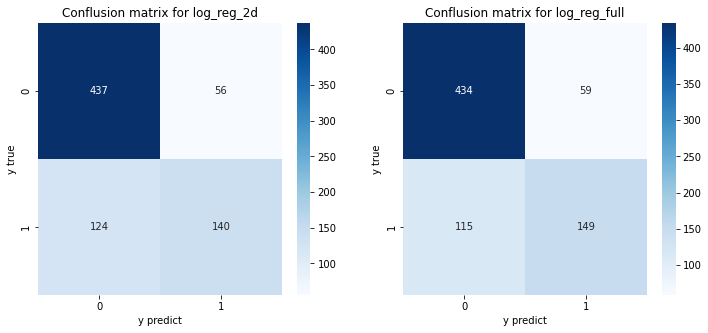

In [43]:
#Строим матрицы ошибок для каждой из моделей
conflusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
conflusion_matrix2 = metrics.confusion_matrix(y, y_pred2)

#Визуализируем матрицы ошибок
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(data=conflusion_matrix1, annot=True, fmt='', cmap='Blues', ax=ax[0])
ax[0].set_title('Conflusion matrix for log_reg_2d')
ax[0].set_ylabel('y true')
ax[0].set_xlabel('y predict')



sns.heatmap(data=conflusion_matrix2, ax=ax[1], annot=True, cmap='Blues', fmt='')
ax[1].set_title('Conflusion matrix for log_reg_full')
ax[1].set_ylabel('y true')
ax[1].set_xlabel('y predict')



In [35]:
print(y[y==1].count())
print(y[y==0].count())

264
493


In [37]:
#Модель log_reg_2d:
#Рассчитываем accuracy
print(f'Accuracy: {round(metrics.accuracy_score(y, y_pred1), 2)}')
print(f'Precission: {round(metrics.precision_score(y, y_pred1), 2)}')
print(f'Recall: {round(metrics.recall_score(y, y_pred1), 2)}')
print(f'F1 score: {round(metrics.f1_score(y, y_pred1), 2)}')

Accuracy: 0.76
Precission: 0.71
Recall: 0.53
F1 score: 0.61


In [38]:
#Модель log_reg_full:
#Рассчитываем accuracy
print(f'Accuracy: {round(metrics.accuracy_score(y, y_pred2), 2)}')
print(f'Precission: {round(metrics.precision_score(y, y_pred2), 2)}')
print(f'Recall: {round(metrics.recall_score(y, y_pred2), 2)}')
print(f'F1 score: {round(metrics.f1_score(y, y_pred2), 2)}')

Accuracy: 0.77
Precission: 0.72
Recall: 0.56
F1 score: 0.63


In [39]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



In [40]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(df.drop('Outcome', axis=1))[:,1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))


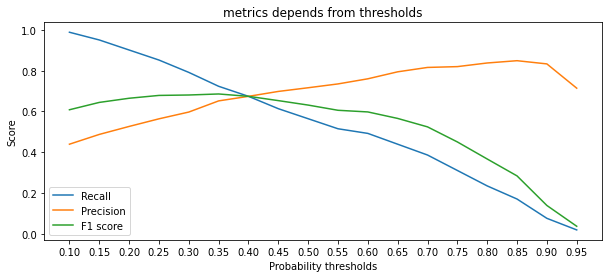

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(thresholds, recall_scores, label='Recall')
ax.plot(thresholds, precision_scores, label='Precision')
ax.plot(thresholds, f1_scores, label='F1 score')

ax.set_title('metrics depends from thresholds')
ax.set_xlabel('Probability thresholds')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend()

In [42]:
threshold_opt = 0.4
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



In [44]:
pen_df = sns.load_dataset('penguins')
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [45]:
pen_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [46]:
pen_df = pen_df.dropna()

In [48]:
X = pen_df.drop('species', axis=1)
y = pen_df['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [49]:
X_dummy = pd.get_dummies(X)
X_dummy.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [50]:
log_reg = linear_model.LogisticRegression(
    random_state=42,
    max_iter=1000,
    multi_class='multinomial'
)

log_reg.fit(X_dummy, y)

y_proba_pred = np.round(log_reg.predict_proba(X_dummy),2)

y_pred = log_reg.predict(X_dummy)



In [52]:
y_proba_pred_df = pd.DataFrame(
    data=y_proba_pred,
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)

y_pred_df = pd.DataFrame(
    data=y_pred,
    columns=['Predicted class']
)

y_df = pd.concat([y_proba_pred_df, y_pred_df], axis=1)

In [53]:
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.76,0.24,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


In [54]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

